<a href="https://colab.research.google.com/github/NiloufarAsghari/Pneumonia-detection/blob/main/PenumoniaDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow.compat.v2 as tf

from keras import backend
from keras.applications import imagenet_utils
from keras.engine import training
from keras.layers import VersionAwareLayers
from keras.utils import data_utils
from keras.utils import layer_utils
from tensorflow.python.util.tf_export import keras_export
import urllib.request
import os
import zipfile
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from shutil import copyfile
import numpy as np

In [ ]:
cwd = os.getcwd()
files = os.listdir(cwd)
print("Files in %r: %s" % (cwd, files))


Files in '/content': ['.config', 'drive', '.ipynb_checkpoints', 'chest_xray', 'kaggle.json', 'sample_data']


In [ ]:
#If your data are in google drive
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
os.chdir('drive')
os.chdir('MyDrive')
cwd = os.getcwd()
files = os.listdir(cwd)
print("Files in %r: %s" % (cwd, files))

In [ ]:
#Skip if it's not first time
#Download Dataset From Kaggle
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json  # allocate permission

In [ ]:
#Skip if it's not first time
#Download The dataset
#! kaggle datasets download Chest X-Ray Images (Pneumonia)
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


In [ ]:
#Skip
#copy to local colab
!cp -av '/content/drive/MyDrive/chest_xray' '/content'

Streaming output truncated to the last 5000 lines.
'/content/drive/MyDrive/chest_xray/train/NORMAL/IM-0724-0001.jpeg' -> '/content/chest_xray/train/NORMAL/IM-0724-0001.jpeg'
'/content/drive/MyDrive/chest_xray/train/NORMAL/IM-0701-0001.jpeg' -> '/content/chest_xray/train/NORMAL/IM-0701-0001.jpeg'
'/content/drive/MyDrive/chest_xray/train/NORMAL/IM-0721-0001.jpeg' -> '/content/chest_xray/train/NORMAL/IM-0721-0001.jpeg'
'/content/drive/MyDrive/chest_xray/train/NORMAL/IM-0722-0001.jpeg' -> '/content/chest_xray/train/NORMAL/IM-0722-0001.jpeg'
'/content/drive/MyDrive/chest_xray/train/NORMAL/IM-0718-0001.jpeg' -> '/content/chest_xray/train/NORMAL/IM-0718-0001.jpeg'
'/content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-0399-0001.jpeg' -> '/content/chest_xray/train/NORMAL/NORMAL2-IM-0399-0001.jpeg'
'/content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-0388-0001.jpeg' -> '/content/chest_xray/train/NORMAL/NORMAL2-IM-0388-0001.jpeg'
'/content/drive/MyDrive/chest_xray/train/NORMAL/IM-0751-

In [ ]:
cwd = os.getcwd()
files = os.listdir(cwd)
print("Files in %r: %s" % (cwd, files))

Files in '/content': ['.config', 'drive', 'sample_data']


In [ ]:
os.chdir('..')
#os.chdir('sample_data')
cwd = os.getcwd()
files = os.listdir(cwd)
print("Files in %r: %s" % (cwd, files))

In [ ]:
#Skip if it's not first time
#UnZipp
! unzip chest-xray-pneumonia.zip

In [ ]:
# print(len(os.listdir('/content/drive/MyDrive/chest_xray/train/')))
# print(len(os.listdir('/content/drive/MyDrive/chest_xray/val/')))
# print(len(os.listdir('/content/drive/MyDrive/chest_xray/test/')))


#if its in content

print(len(os.listdir('/content/chest_xray/train/')))
print(len(os.listdir('/content/chest_xray/val/')))
print(len(os.listdir('/content/chest_xray/test/')))

#2
#2
#2

2
2
2


In [ ]:
#Building VGG16 Model
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
# model = Sequential()
# model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Flatten())
# tf.keras.layers.Dropout(0.5)
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=512,activation="relu"))
# model.add(Dense(units=1, activation="softmax"))


VGG=tf.keras.applications.VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
VGG.trainable = False
model= tf.keras.Sequential([
                         VGG,
                         tf.keras.layers.Flatten(),
                       #  tf.keras.layers.Dense(units=4096,activation='relu'),
                         tf.keras.layers.Dense(units=128,activation='relu'),
                         tf.keras.layers.Dense(units=32,activation='relu'),
                         tf.keras.layers.Dropout(0.5),
                         tf.keras.layers.Dense(units=1,activation='sigmoid'),                         
])

In [ ]:
# opt = tf.keras.optimizers.Adam(learning_rate=0.0006)
# model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               3211392   
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17,930,241
Trainable params: 3,215,553
N

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
      rotation_range=180,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=[0.9, 1.5],
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [ ]:
train_data = train_datagen.flow_from_directory('/content/chest_xray/train',
                                                 batch_size=16,
                                               class_mode='binary',
                                               target_size=(224, 224))
val_data = val_datagen.flow_from_directory('/content/chest_xray/val',
                                                  batch_size=16,
                                           class_mode='binary',
                                           target_size=(224, 224))
test_data = test_datagen.flow_from_directory('/content/chest_xray/test',
                                                  batch_size=16,
                                             class_mode='binary',
                                             target_size=(224, 224))
#It should be:
#Found 5216 images belonging to 2 classes.
#Found 16 images belonging to 2 classes.
#Found 624 images belonging to 2 classes.

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
#Visulize
import matplotlib.pyplot as plt

class_names = ['NORMAL', 'PNEUMONIA']

plt.figure(figsize=(15,15))
class_names = train_data.class_names

for images,labels in train_data.take(2):
    for i in range(32):
        ax=plt.subplot(6,6,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
#skip
!pip install tensorflow==2.7.0

In [ ]:
history = model.fit(
    train_data,
    epochs=10,
    verbose=1,
   validation_data = val_data
)

Epoch 1/10
326/326 [==============================] - 113s 344ms/step - loss: 0.1413 - accuracy: 0.9484 - val_loss: 0.8589 - val_accuracy: 0.7500
Epoch 2/10
326/326 [==============================] - 110s 338ms/step - loss: 0.1380 - accuracy: 0.9484 - val_loss: 0.5405 - val_accuracy: 0.8750
Epoch 3/10
326/326 [==============================] - 110s 338ms/step - loss: 0.1437 - accuracy: 0.9490 - val_loss: 0.6295 - val_accuracy: 0.8750
Epoch 4/10
326/326 [==============================] - 110s 339ms/step - loss: 0.1302 - accuracy: 0.9511 - val_loss: 0.6505 - val_accuracy: 0.8125
Epoch 5/10
326/326 [==============================] - 111s 340ms/step - loss: 0.1379 - accuracy: 0.9496 - val_loss: 0.5608 - val_accuracy: 0.8125
Epoch 6/10
326/326 [==============================] - 110s 339ms/step - loss: 0.1366 - accuracy: 0.9505 - val_loss: 0.7644 - val_accuracy: 0.8125
Epoch 7/10
326/326 [==============================] - 112s 343ms/step - loss: 0.1421 - accuracy: 0.9477 - val_loss: 0.7082 -

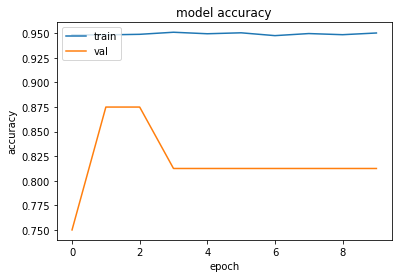

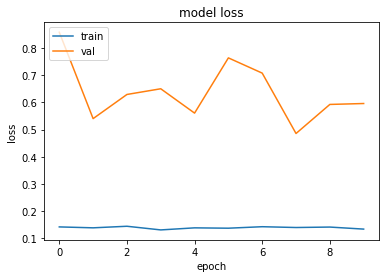

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()